# Introduction
Hello people, in this kernel I am going to classify images using VGG19 pre trained model. Before starting, let's take a look at the content of the kernel

# Notebook Content
1. Importing Necessary Libraires
1. Loading Data
1. Data Overview
1. Data Preprocessing
1. Preparing VGG19
1. Training and Evaluating Results
1. Conclusion

# Importing Necessary Libraries

In [1]:
import numpy as np
import cv2
import os
import time
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam,RMSprop,SGD
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix


# Loading Data
In this section I am going to load the data. 

In [2]:
daisy_flower_paths = glob("../input/flowers-recognition/flowers/daisy"+"/*")
dandelion_flower_paths = glob("../input/flowers-recognition/flowers/dandelion"+"/*")
rose_flower_paths = glob("../input/flowers-recognition/flowers/rose"+"/*")
sunflower_flower_paths = glob("../input/flowers-recognition/flowers/sunflower"+"/*")
tulip_paths = glob("../input/flowers-recognition/flowers/tulip"+"/*") 


In [3]:
images = []
labels = []

for im_path in daisy_flower_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(0)
    except:
        print(im_path)

for im_path in dandelion_flower_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(1)
    except:
        print(im_path)
    
for im_path in rose_flower_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(2)
    except:
        print(im_path)

for im_path in sunflower_flower_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(3)
    except:
        print(im_path)

for im_path in tulip_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(4)  
    except:
        print(im_path)
    

data = np.array(images)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

../input/flowers-recognition/flowers/dandelion/flickr.pyc
../input/flowers-recognition/flowers/dandelion/run_me.py
../input/flowers-recognition/flowers/dandelion/flickr.py
(4323, 224, 224, 3)
(4323,)


# Data Overview
In this section I am going to examine the data.

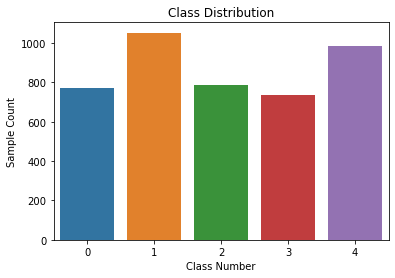

In [4]:
# class distrubiton
plt.subplots(figsize=(6,4))
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Number")
plt.ylabel("Sample Count")
plt.show()

* Data is balanced.

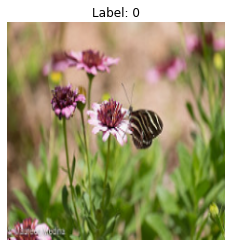

In [5]:
# checking random samples
def check_sample(idx):
    plt.imshow(data[idx])
    plt.title("Label: {}".format(labels[idx]))
    plt.axis("off")
    plt.show()
    
check_sample(123)

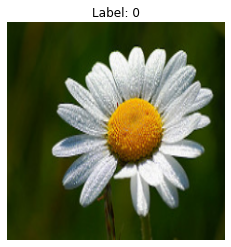

In [6]:
check_sample(678)

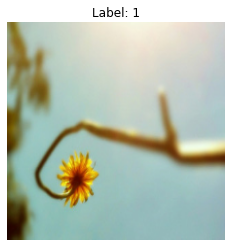

In [7]:
check_sample(1233)

# Data Preprocessing
In this section I am going to process the data in order to use in the model.

In [8]:
# label encoding
labels = to_categorical(labels,num_classes=5)
labels.shape

(4323, 5)

In [9]:
labels[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# train test splitting
x_train,x_test,y_train,y_test = train_test_split(data,labels)

print("x_train shape ",x_train.shape)
print("x_test shape" ,x_test.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

x_train shape  (3242, 224, 224, 3)
x_test shape (1081, 224, 224, 3)
y_train shape  (3242, 5)
y_test shape  (1081, 5)


# Preparing VGG19 Model
In this section I am going to prepare VGG19 model.

In [11]:
VGG = VGG19(weights="imagenet")
VGG.summary()

574717952/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [12]:
# creating a blank model
model = Sequential()

# adding layers
for i in range(len(VGG.layers)-1):
    model.add(VGG.layers[i])
    

In [13]:
# freezing layers
for layer in model.layers:
    layer.trainable = False
    

In [14]:
# adding prediction layer
model.add(Dense(5,activation="softmax"))

In [15]:
optim = Adam(lr=1e-4)
model.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])

# Training and Evaluating Results
In this section I am going to train and evaluate the model.

In [16]:
# Data Augmentation
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True
                            )

datagen.fit(x_train)

In [17]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=100)

Epoch 1/100
102/102 [==============================] - 8s 82ms/step - loss: 1.2847 - accuracy: 0.5031
Epoch 2/100
102/102 [==============================] - 8s 78ms/step - loss: 0.7707 - accuracy: 0.7190
Epoch 3/100
102/102 [==============================] - 8s 79ms/step - loss: 0.6626 - accuracy: 0.7563
Epoch 4/100
102/102 [==============================] - 8s 81ms/step - loss: 0.6011 - accuracy: 0.7795
Epoch 5/100
102/102 [==============================] - 8s 78ms/step - loss: 0.5471 - accuracy: 0.7961
Epoch 6/100
102/102 [==============================] - 8s 78ms/step - loss: 0.5090 - accuracy: 0.8125
Epoch 7/100
102/102 [==============================] - 8s 81ms/step - loss: 0.4713 - accuracy: 0.8291
Epoch 8/100
102/102 [==============================] - 8s 79ms/step - loss: 0.4548 - accuracy: 0.8359
Epoch 9/100
102/102 [==============================] - 8s 77ms/step - loss: 0.4335 - accuracy: 0.8402
Epoch 10/100
102/102 [==============================] - 8s 78ms/step - loss: 0.423

In [18]:
model.evaluate(x_test,y_test)

34/34 [==============================] - 3s 88ms/step - loss: 0.5635 - accuracy: 0.8224


[0.5634545087814331, 0.8223866820335388]

* Test accuracy is %84. Great!
* Let's evaluate results.

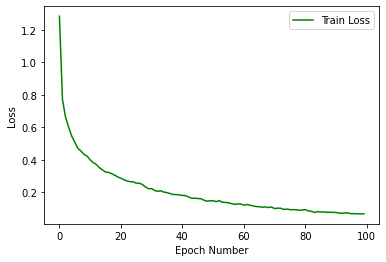

In [19]:
# loss graph
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["loss"],color="green",label="Train Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()

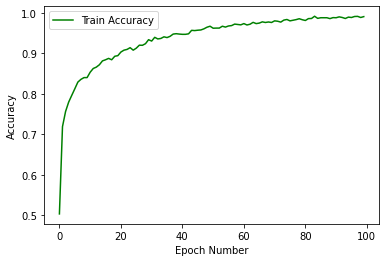

In [20]:
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["accuracy"],color="green",label="Train Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* Everything looks fine.

* Let's check confusion matrix

In [21]:
y_true = np.argmax(y_test, axis=1) # Decoding our one hot vectors
y_pred = model.predict_classes(x_test)

# Creating confusion matrix
conf_matrix = confusion_matrix(y_true=y_true,y_pred=y_pred)


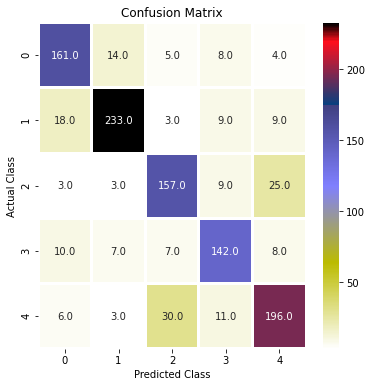

In [22]:
plt.subplots(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True,fmt=".1f",cmap="gist_stern_r",linewidths=2.0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Conclusion

Thanks for your attention, if you have questions in your mind, please ask. I will definetely return to you. 

And if you liked this kernel, if you upvote I would be glad.